In [1]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Dataset 불러오기

In [3]:
edu_data=pd.read_csv('C:/Users/허욱/Documents/Project/students_adaptability_level_online_education.csv')

In [4]:
feature_names = edu_data.columns.tolist() # eo==대이터프레임 열을 목록으로 변환

In [5]:
feature_names # feature 변수들은 어떠한 것들이 있는지 확인

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load_shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device',
 'Adaptivity_Level']

In [6]:
edu_data # 데이터 확인 

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,03-06,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,01-03,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,01-03,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,03-06,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,01-03,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,01-03,No,Mobile,Low


In [7]:
sel_encoded_edu_data=pd.DataFrame(edu_data)
sel_encoded_edu_data['Gender']=edu_data['Gender'].map(
{'Boy':1,'Girl':0})
sel_encoded_edu_data['Age']=edu_data['Age'].map(
{'01-05':0,'06-10':1, '11-15':2, '16-20':3,'21-25':4, '26-30':5})
sel_encoded_edu_data['Education_Level']=edu_data['Education_Level'].map(
{'School':0,'University':1, 'College':2})
sel_encoded_edu_data['Institution_Type']=edu_data['Institution_Type'].map(
{'Government':0,'Non Government':1})
sel_encoded_edu_data['IT_Student']=edu_data['IT_Student'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Location']=edu_data['Location'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Load_shedding']=edu_data['Load_shedding'].map(
{'Low':0,'High':1})
sel_encoded_edu_data['Financial_Condition']=edu_data['Financial_Condition'].map(
{'Poor':0,'Mid':1, 'Rich':2})
sel_encoded_edu_data['Internet_Type']=edu_data['Internet_Type'].map(
{'Wifi':0,'Mobile Data':1})
sel_encoded_edu_data['Network_Type']=edu_data['Network_Type'].map(
{'2G':0,'3G':1, '4G':2})
sel_encoded_edu_data['Class_Duration']=edu_data['Class_Duration'].map(
{'0':0,'01-03':1, '03-06':2})
sel_encoded_edu_data['Self_Lms']=edu_data['Self_Lms'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Device']=edu_data['Device'].map(
{'Tab':0,'Mobile':1, 'Computer':2})
sel_encoded_edu_data['Adaptivity_Level']=edu_data['Adaptivity_Level'].map(
{'Moderate':1,'Low':0,'High':2})

In [8]:
sel_encoded_edu_data

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,1,4,1,1,0,1,0,1,0,2,2,0,0,1
1,0,4,1,1,0,1,1,1,1,2,1,1,1,1
2,0,3,2,0,0,1,0,1,0,2,1,0,1,1
3,0,2,0,1,0,1,0,1,1,2,1,0,1,1
4,0,3,0,1,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,3,2,1,0,1,0,1,0,2,1,0,1,0
1201,0,3,2,1,0,0,1,1,0,2,2,0,1,1
1202,1,2,0,1,0,1,0,1,1,1,1,0,1,1
1203,0,3,2,1,0,0,0,1,0,2,1,0,1,0


In [9]:
sel_encoded_edu_data.describe()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.550207,2.843983,0.741909,0.682988,0.252282,0.775934,0.166805,0.869710,0.576763,1.627386,1.047303,0.174274,1.109544,0.684647
std,0.497679,1.257096,0.745269,0.465506,0.434503,0.417139,0.372956,0.504584,0.494277,0.515295,0.548559,0.379502,0.384003,0.618221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [10]:
X=sel_encoded_edu_data.iloc[:,:13]
y=sel_encoded_edu_data['Adaptivity_Level']
X

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device
0,1,4,1,1,0,1,0,1,0,2,2,0,0
1,0,4,1,1,0,1,1,1,1,2,1,1,1
2,0,3,2,0,0,1,0,1,0,2,1,0,1
3,0,2,0,1,0,1,0,1,1,2,1,0,1
4,0,3,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,3,2,1,0,1,0,1,0,2,1,0,1
1201,0,3,2,1,0,0,1,1,0,2,2,0,1
1202,1,2,0,1,0,1,0,1,1,1,1,0,1
1203,0,3,2,1,0,0,0,1,0,2,1,0,1


In [11]:
feature_names[:13]

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load_shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device']

In [16]:
train_acc= []
test_acc= []
for n in range(1,50):
    tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=n,random_state=42)
    tree_clf.fit(X_train,y_train)
    pred_train=tree_clf.predict(X_train)
    pred_test=tree_clf.predict(X_test)
    train_acc.append(accuracy_score(pred_train,y_train))
    test_acc.append(accuracy_score(pred_test,y_test))
    print(f"n={n}")
    print(f"Train Accuracy : {accuracy_score(pred_train,y_train)}")
    print(f"Test Accuracy : {accuracy_score(pred_test,y_test)}")
    print('==========================================')

n=1
Train Accuracy : 0.6390041493775933
Test Accuracy : 0.5933609958506224
n=2
Train Accuracy : 0.6441908713692946
Test Accuracy : 0.6099585062240664
n=3
Train Accuracy : 0.6556016597510373
Test Accuracy : 0.6556016597510373
n=4
Train Accuracy : 0.6794605809128631
Test Accuracy : 0.6721991701244814
n=5
Train Accuracy : 0.700207468879668
Test Accuracy : 0.6680497925311203
n=6
Train Accuracy : 0.7437759336099585
Test Accuracy : 0.7344398340248963
n=7
Train Accuracy : 0.803941908713693
Test Accuracy : 0.7634854771784232
n=8
Train Accuracy : 0.8319502074688797
Test Accuracy : 0.8174273858921162
n=9
Train Accuracy : 0.8537344398340249
Test Accuracy : 0.7966804979253111
n=10
Train Accuracy : 0.8827800829875518
Test Accuracy : 0.8381742738589212
n=11
Train Accuracy : 0.8910788381742739
Test Accuracy : 0.8506224066390041
n=12
Train Accuracy : 0.8983402489626556
Test Accuracy : 0.8506224066390041
n=13
Train Accuracy : 0.91701244813278
Test Accuracy : 0.8506224066390041
n=14
Train Accuracy : 0.9

Text(0, 0.5, 'acc')

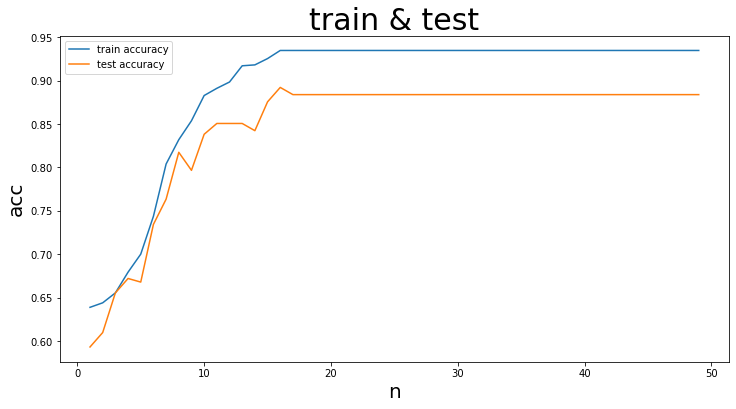

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,50), y = train_acc, label = "train accuracy")
sns.lineplot(x = range(1,50), y = test_acc, label = "test accuracy")
plt.title("train & test", fontsize = 30)
plt.xlabel("n",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
tree_clf1=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
tree_clf1.fit(X_train,y_train)
pred_test=tree_clf1.predict(X_test)
y_test

# 혼동행렬 (모델의 성능을 평가할 대 사용되는 지표) 
# 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬
confusion_matrix(pred_test,y_test)


array([[ 85,   8,   0],
       [ 16, 103,   9],
       [  2,   4,  14]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

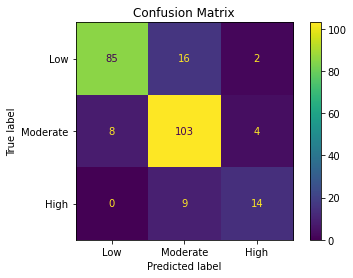

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


label=['Low', 'Moderate', 'High'] 
plot = plot_confusion_matrix(tree_clf1, # 분류 모델
                             X_test,y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
acc = []
for k in range(2, 50):
  score = cross_val_score(tree_clf1, X_train, y_train, cv=k)
  acc.append(score.mean())

In [21]:
max(acc)

0.8621031746031745

In [22]:
cvs=cross_val_score(tree_clf1, X_train, y_train, cv=10)

In [23]:
np.mean(cvs)

0.8454252577319588

In [24]:
cvs2=cross_val_score(tree_clf1, X_train, y_train, cv=5)

In [25]:
np.mean(cvs2)

0.824627590673575

label encoding 을 통한 머신러닝 진행

Device 를 제외한 variable 들이 순서에 의미가 있거나 binary categorical variable이므로

Device 를 제외한 12개 변수를 label encoding 진행